In [1]:
# my notes https://docs.google.com/document/d/1YwC5URk4_qqMq1PMHV12hBXpbnKMR5h48wzmpHIZgss/edit
# https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import metrics
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
train = pd.read_csv('./aug_train.csv', encoding='utf-8')
test = pd.read_csv('./aug_test.csv', encoding='utf-8')

In [4]:
train.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
test.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


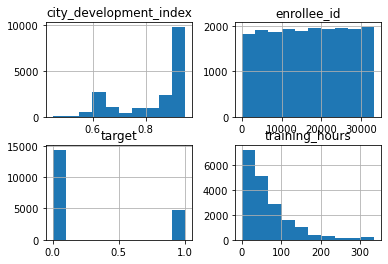

In [8]:
train.hist();

# Feature Engineering

In [9]:
def get_text_columns(d):
    current_filter = d.dtypes == object
    columns = [c for c in current_filter.index if current_filter[c]]
    
    return columns
    
def get_numeric_columns(d):
        current_filter = (d.dtypes == float) | (d.dtypes == int)
        columns = [c for c in current_filter.index if current_filter[c]]

        return columns

In [10]:
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

In [11]:
cat_cols = ['last_new_job', 'experience', 'relevent_experience']
num_cols = ['training_hours', 'target', 'enrollee_id']

cat_dataset_train = train[cat_cols]
num_dataset_train = train[num_cols]
cat_dataset_test = test[cat_cols]
num_dataset_test = test[['enrollee_id', 'training_hours']]

In [12]:
cat_dataset_train

,last_new_job,experience,relevent_experience
0,1,>20,Has relevent experience
1,>4,15,No relevent experience
2,never,5,No relevent experience
3,never,<1,No relevent experience
4,4,>20,Has relevent experience
...,...,...,...
19153,1,14,No relevent experience
19154,4,14,Has relevent experience
19155,4,>20,Has relevent experience
19156,2,<1,Has relevent experience


Text(0.5, 1.0, '0 – Not looking for job change, 1 – Looking for a job change')

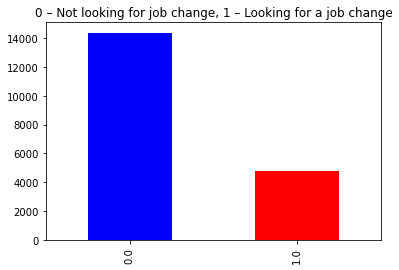

In [13]:
num_dataset_train.target.value_counts().plot(kind='bar', color=['b', 'r'])
plt.title('0 – Not looking for job change, 1 – Looking for a job change')

# Scaler

In [14]:
# scaler = StandardScaler()
# scaler.fit(num_dataset)
# data = scaler.transform(num_dataset)

# num_dataset = pd.DataFrame(data=data, index=num_dataset.index, columns=num_dataset.columns)

# One hot encoding

In [15]:
# dataset.apply(pd.Series.nunique).value_counts

In [16]:
# cat_dataset_train_enc = pd.get_dummies(cat_dataset_train)
# cat_dataset_test_enc = pd.get_dummies(cat_dataset_test)


# print('dataset train', cat_dataset_train_enc.shape)
# print('dataset test', cat_dataset_test_enc.shape)

In [17]:
# cat_dataset_train_enc.head(2)

In [18]:
# cat_dataset_test_enc.head(2)

In [19]:
encoder = ce.BinaryEncoder(cols=cat_cols)
cat_dataset_train_binenc = encoder.fit_transform(cat_dataset_train)
cat_dataset_test_binenc = encoder.fit_transform(cat_dataset_test)

print('dataset binenc train', cat_dataset_train_binenc.shape)
print('dataset binecn test', cat_dataset_test_binenc.shape)

cat_dataset_test_binenc

dataset binenc train (19158, 12)
dataset binecn test (2129, 12)


,last_new_job_0,last_new_job_1,last_new_job_2,last_new_job_3,experience_0,experience_1,experience_2,experience_3,experience_4,experience_5,relevent_experience_0,relevent_experience_1
0,0,0,0,1,0,0,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,1,1,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1
4,0,0,1,1,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0,1,0,1,0,1,0,0,1,1,1,0
2125,0,1,0,0,0,1,0,1,1,0,0,1
2126,0,0,1,0,0,0,1,0,0,0,1,0
2127,0,0,0,1,0,0,1,1,1,1,0,1


# Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataset_train = pd.concat([cat_dataset_train_binenc, num_dataset_train], axis=1)
y = dataset_train['target']
X = dataset_train.drop(['target'], axis=1)

In [21]:
# test dataset
# sample_submission = pd.read_csv('./sample_submission.csv', encoding='utf-8')
# dataset_test = pd.concat([cat_dataset_test_binenc, num_dataset_test], axis=1)
# dataset_test = pd.merge(sample_submission, dataset_test, on='enrollee_id', how='left')

In [22]:
# dataset_test.head()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
print('score', model.score(X_test, y_test))

score 0.7519832985386221


In [25]:
# y_test2 = dataset_test['target']
# X_test2 = dataset_test.drop('target', axis=1)
# print('score', model.score(X_test2, y_test2))

(array([   0.,    0.,    0.,    0.,    0., 4790.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

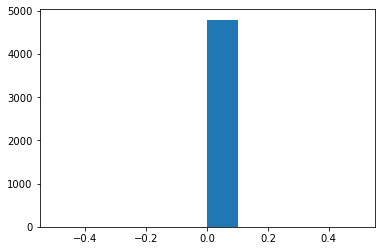

In [26]:
predicted = model.predict(X_test)
plt.hist(predicted)

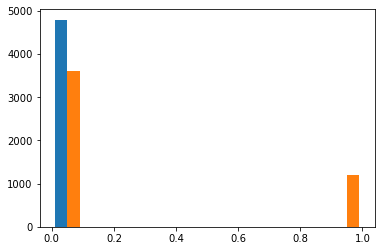

In [27]:
plt.hist([predicted, y_test]);

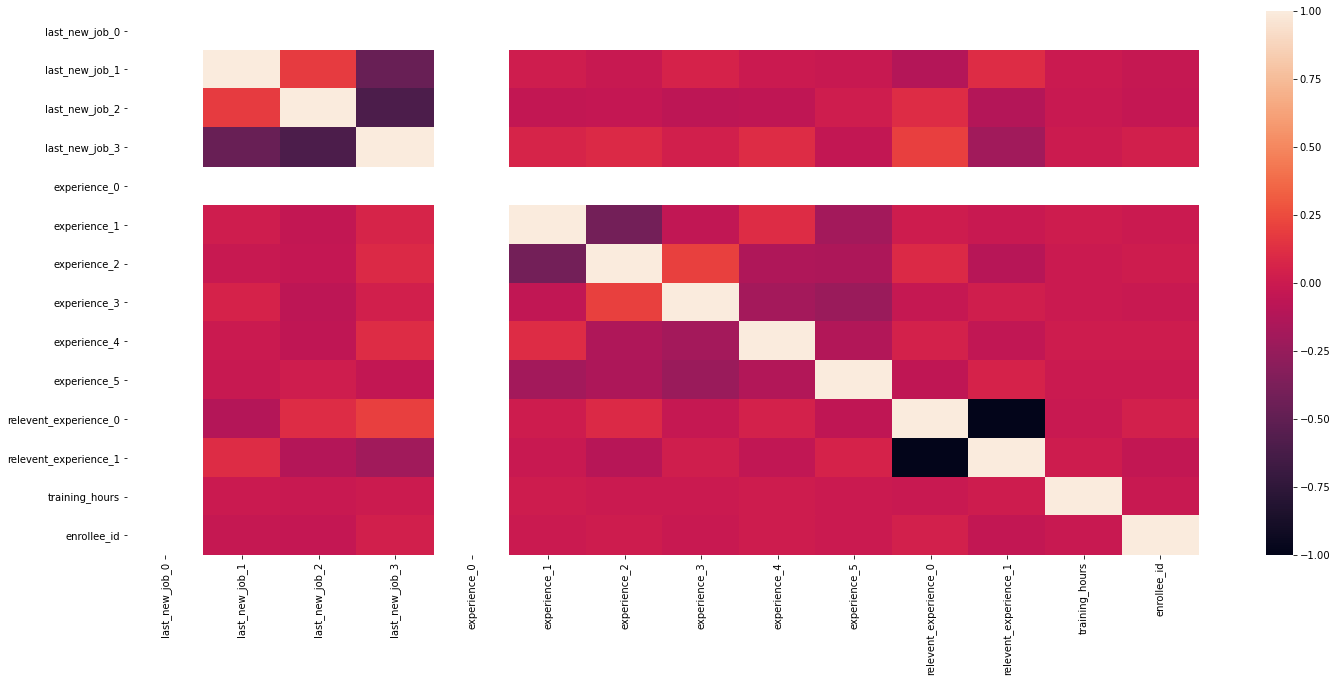

In [28]:
plt.rcParams['figure.figsize'] = [24, 10]
sns.heatmap(X_train.corr())

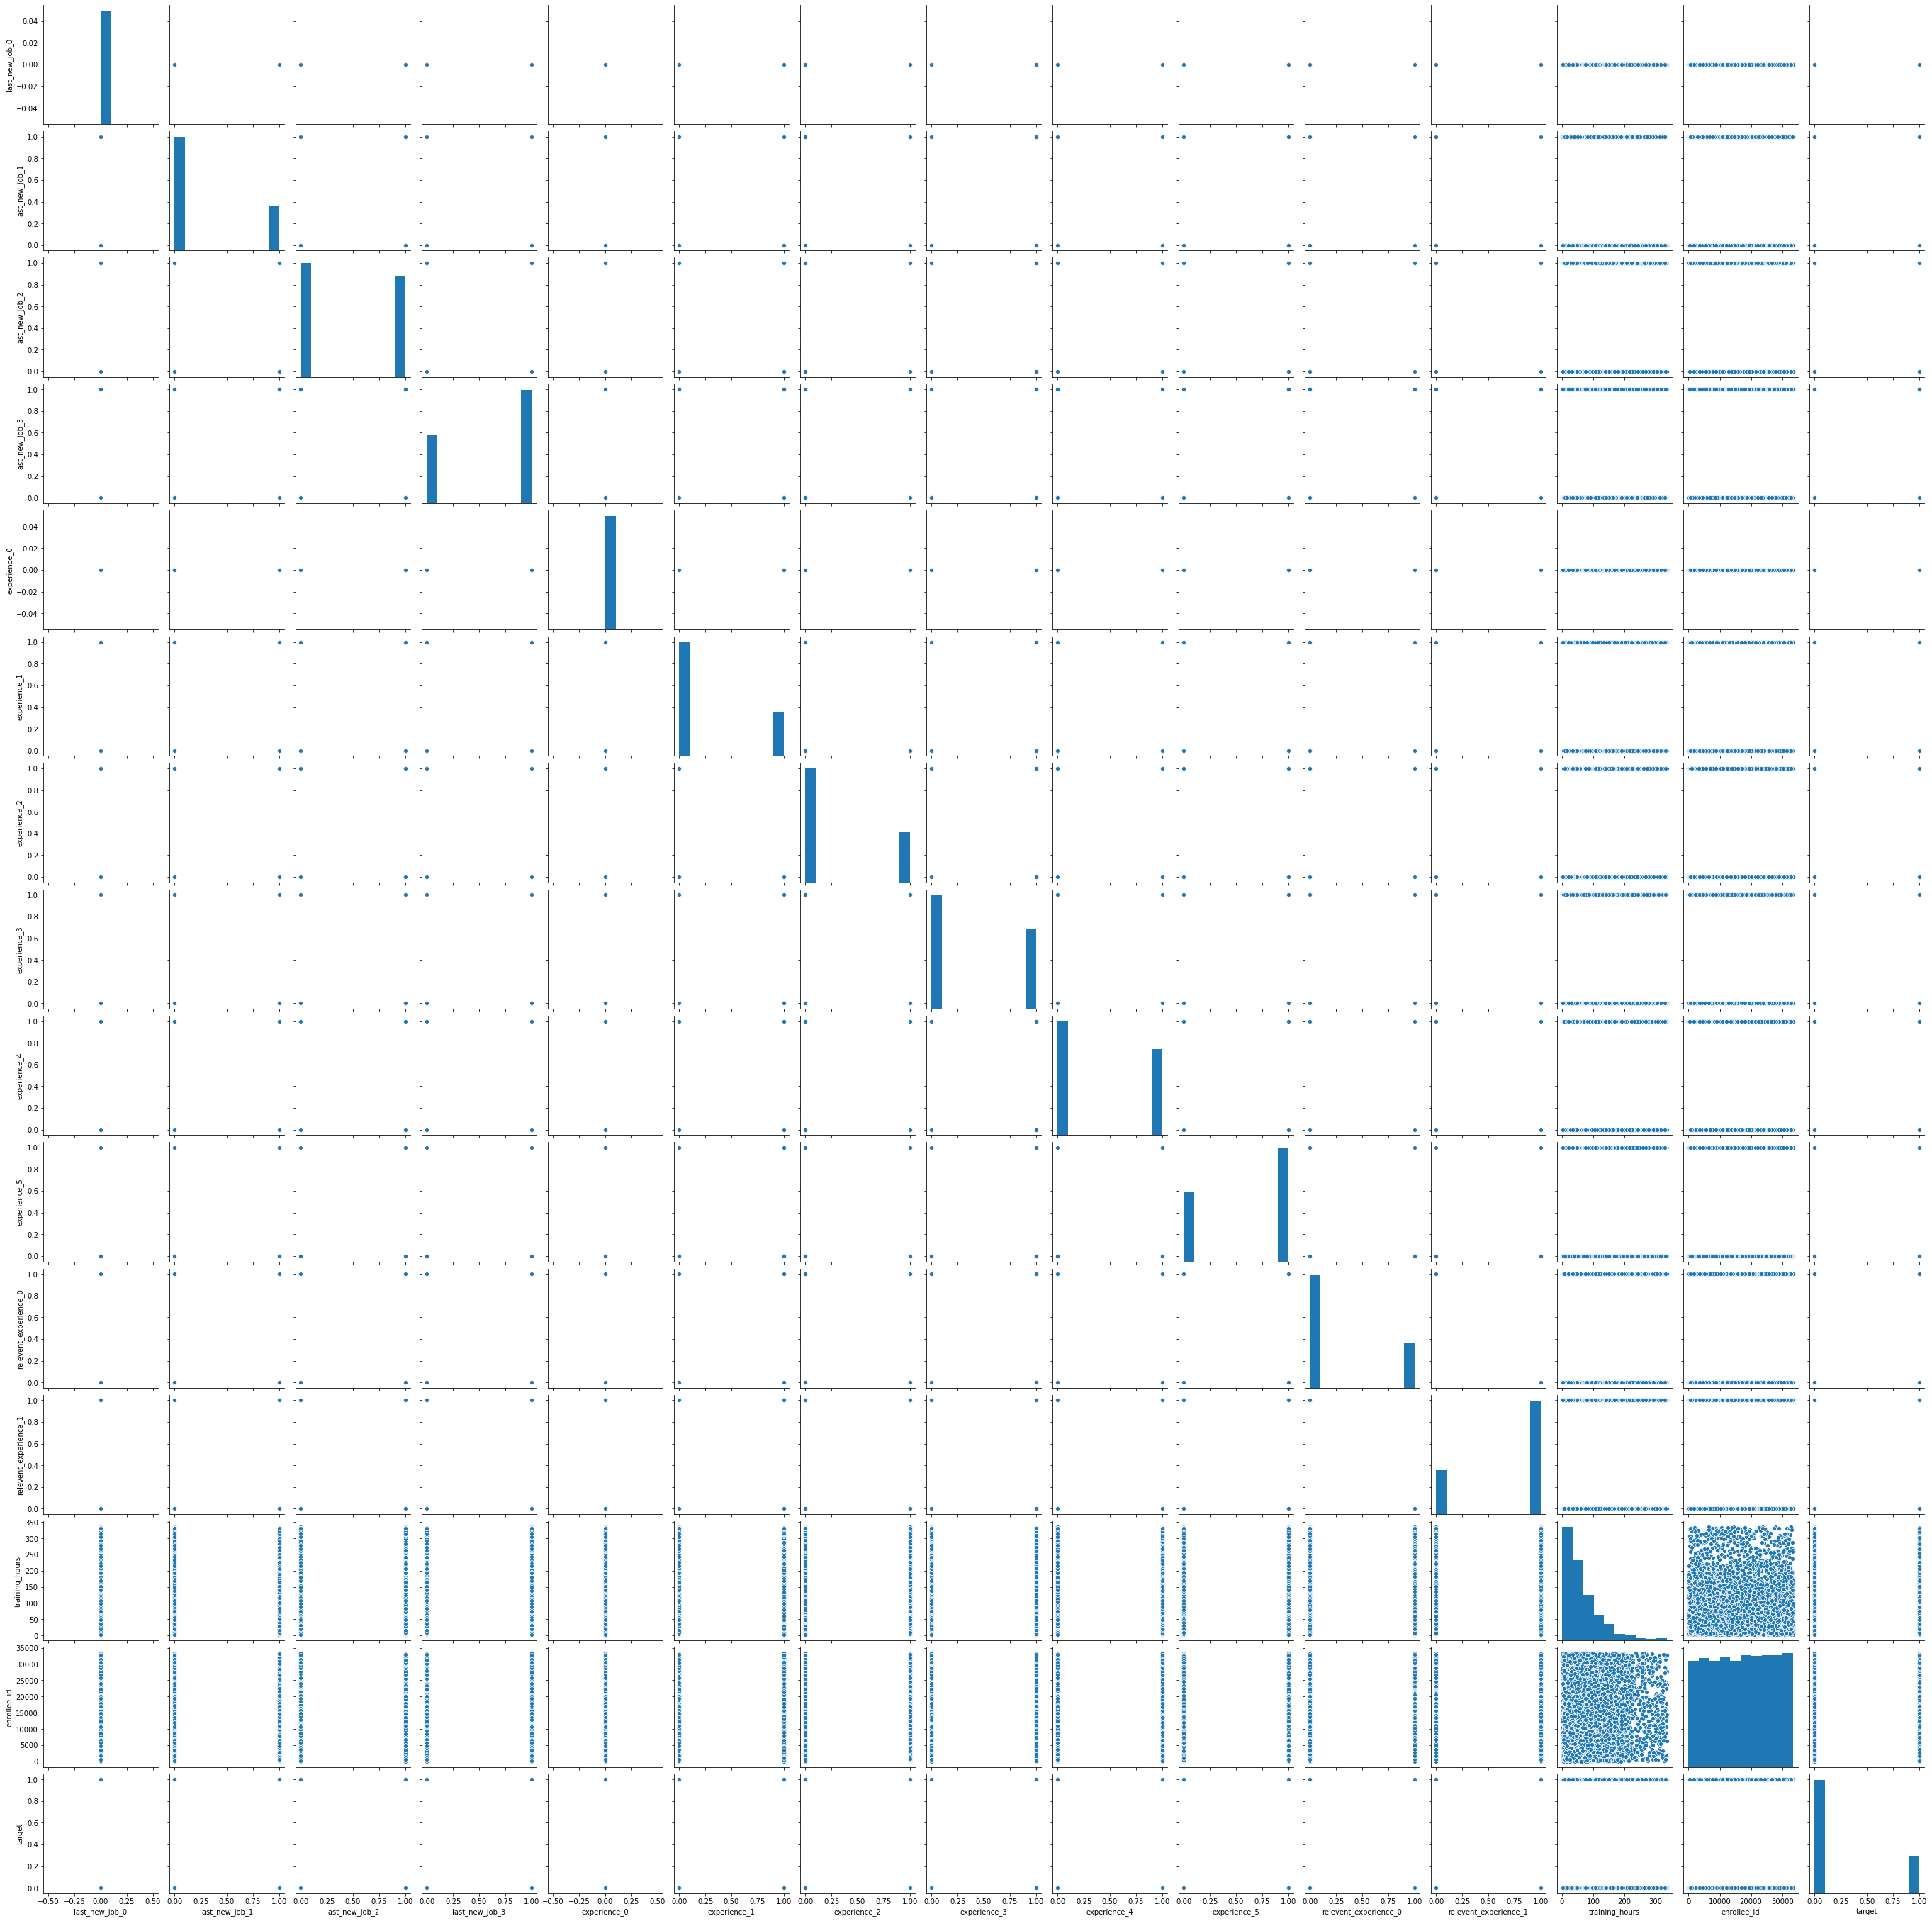

In [29]:
z = pd.concat([X_train,y_train], axis=1)
sns.pairplot(z)

In [30]:
cls = pd.cut(X_train['training_hours'], 8).cat.codes.rename('class')
z2 = pd.concat([X_train2, cls], axis=1)
sns.pairplot(z2, hue='class')

NameError: name 'X_train2' is not defined

In [ ]:
sns.heatmap(z2.corr(), annot=True)

In [ ]:
cat_dataset_test_binenc = encoder.fit_transform(dataset_test)

# Selection de features automaticas

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


selector = SelectKBest(mutual_info_regression, 3)
selector.fit(X_train, y_train)
scores = selector.scores_
plt.rcParams['figure.figsize'] = [24, 10]
plt.xticks(np.arange(40), list(X_train.columns));
plt.plot(scores)

# matrix confusion

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
class_name = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_name))
plt.xticks(tick_marks, class_name)
plt.yticks(tick_marks, class_name)

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matrix confusion', y=1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
np.mean(scores)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, validation_curve

result = cross_validate(LogisticRegression(), X_train, y_train, return_train_score=True, cv=5)
result

In [ ]:
test_score = result['test_score']
train_score = result['train_score']

print(np.mean(test_score))
print(np.mean(train_score))

In [ ]:
scores.mean()

In [ ]:
n = np.arange(2, 50, 2)
train_scores, test_scores = validation_curve(
    KNeighborsRegressor(),
    X_train,
    y_train,
    param_name='n_neighbors',
    param_range=n,
    cv=5)
# help(LogisticRegression)

In [ ]:
np.mean(train_scores, axis=1);
np.mean(train_scores, axis=1);

In [ ]:
plt.plot(np.mean(train_scores, axis=1));
plt.plot(np.mean(test_scores, axis=1));
plt.xticks(np.arange(24), n);

In [ ]:
help(LogisticRegression())

In [ ]:
# !pip install delayed;
# from sklearn.ensemble import RandomForestRegressor

# Version 3

In [ ]:
train = pd.read_csv('./aug_train.csv', encoding='utf-8')

In [ ]:
train.notnull().apply(pd.Series.value_counts)

In [ ]:
train.notnull().apply(pd.Series.value_counts)

In [ ]:
def normailize_column(df, cols):
    for col in cols:
        p = df[col].value_counts(normalize=True)  # Series of probabilities
        m = df[col].isnull()
    
        np.random.seed(42)
        rand_fill = np.random.choice(p.index, size=m.sum(), p=p)
        #array(['Joe', 'Mark'], dtype=object)

        df.loc[m, col] = rand_fill
    
    return df


In [ ]:
train = normailize_column(train, ['gender', 'education_level', 'major_discipline'])

In [ ]:
train.notnull().apply(pd.Series.value_counts)

In [ ]:
train.head()